<a href="https://colab.research.google.com/github/Arrnv/Neural_network_classification/blob/main/Classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to neural network classification with tensorflow

In this notebook we are going to learn how to write neural network for classification problem

A classification is where you try to classify something as one thing as another

There are few types of classification

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Creating circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now so..... let's visualize it

In [4]:
import pandas as pd
circle = pd.DataFrame({"X0": X[:,0] , "X1":X[:,1] , "label":y})
circle

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


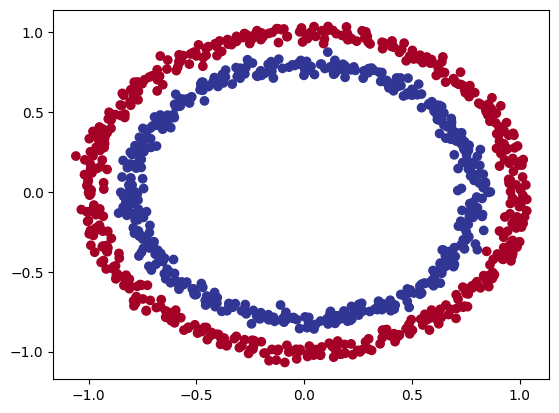

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y , cmap = plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples are we working with
len(X) , len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#Steps into modeling

The steps in modeling with tensorflow are tipically:

1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate....

In [9]:
import tensorflow as tf

# set the random seed
tf.random.set_seed(42)

# 1. Create the model using sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.7534 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3697 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 2.3819 - accuracy: 0.4830
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7477 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.4920


In [10]:
model_1.fit(X,y, epochs=200 ,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

# Improving the model
Since we are working on binary classification and our model is getting around ~50% accuracy .... It's performing as its guessing.

So let's take things up a notch and add an extra layer.

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fitting the model
model_2.fit(X,y,epochs=5, verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5050


[0.6935751438140869, 0.5049999952316284]

# Improving our model

1. Creating the model - We mignt add more layers or increase number of hidden units within layers
2. Compiling the model- Here we might to choose different optimization function such as Adam instead of SGD
3. Fitting a model- Perhaps we might fit our model for more epochs

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. fitting the model
model_3.fit(X, y, epochs = 100 , verbose=0)

In [13]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.5040


[0.7018237113952637, 0.5040000081062317]

In [14]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


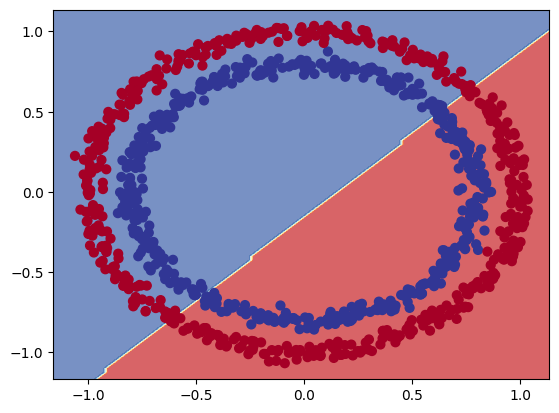

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2822 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3920 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 2.5130 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.6490 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.5242 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.4848 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 1.4550 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4296 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4073 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3867 - accuracy: 0.5000
Epoch 11/

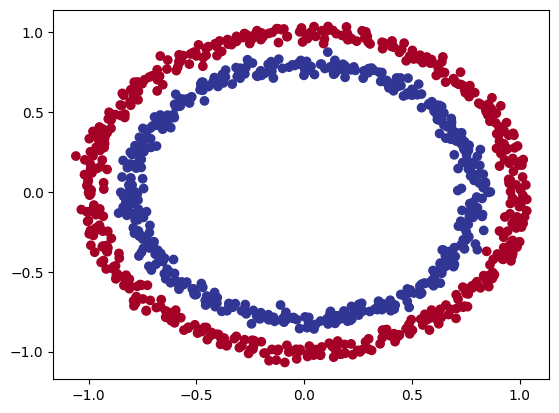

In [18]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


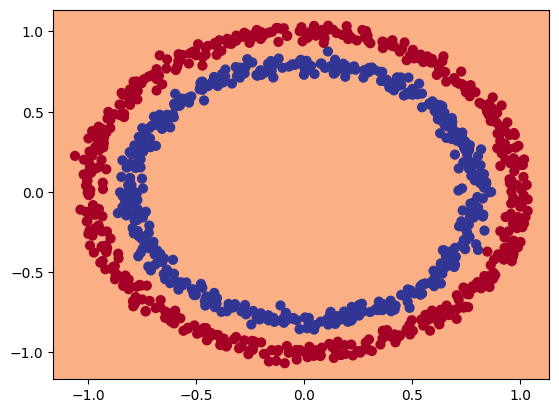

In [19]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [22]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


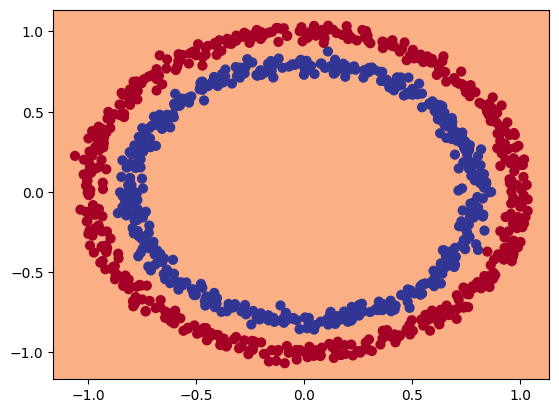

In [23]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [25]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.9960


[0.31622982025146484, 0.9959999918937683]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


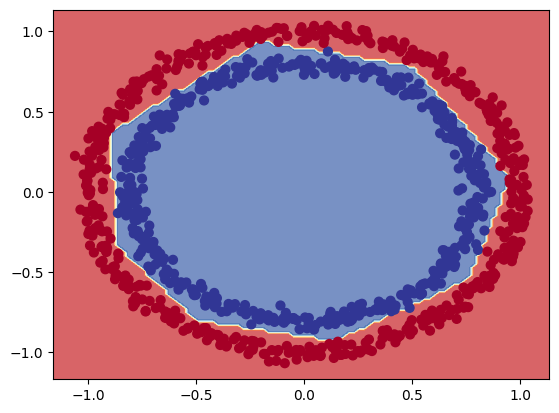

In [26]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [28]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. fittng the model

history = model_8.fit(X_train,y_train , epochs=25)

Epoch 1/25
22/22 [==============================] - 2s 7ms/step - loss: 0.6930 - accuracy: 0.4957
Epoch 2/25
22/22 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5071
Epoch 3/25
22/22 [==============================] - 0s 8ms/step - loss: 0.6909 - accuracy: 0.4871
Epoch 4/25
22/22 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.5014
Epoch 5/25
22/22 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.5086
Epoch 6/25
22/22 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.5143
Epoch 7/25
22/22 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.5257
Epoch 8/25
22/22 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5157
Epoch 9/25
22/22 [==============================] - 0s 7ms/step - loss: 0.6713 - accuracy: 0.5714
Epoch 10/25
22/22 [==============================] - 0s 5ms/step - loss: 0.6632 - accuracy: 0.5714
Epoch 11/25
22/22 [

In [29]:
# 4. evaluting the model
model_8.evaluate(X_test,y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9900


[0.11293788999319077, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


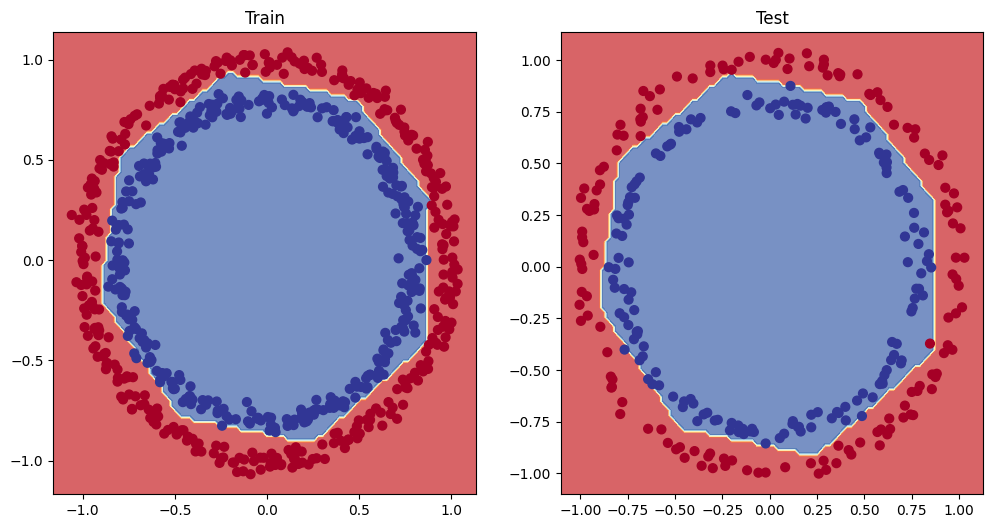

In [30]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()


# Loss corve

Text(0.5, 1.0, 'Model_8 loss curve')

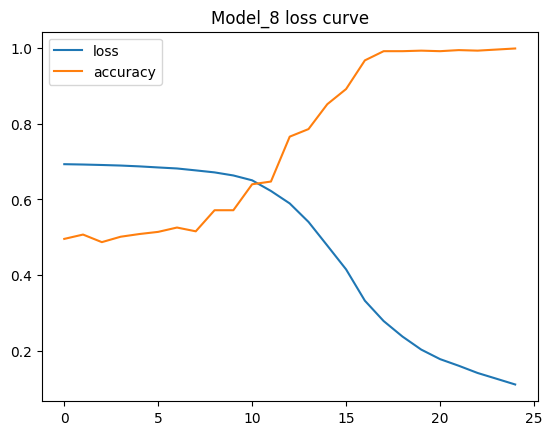

In [31]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

# Finding the best Learning rate

In [32]:
# Setting up the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compiling the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

# 3. creating a learning rate call back
lr_schedular =tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# 4. Fitting the model
history = model_9.fit(X_test,y_test,epochs=100,
                      callbacks=[lr_schedular])

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.5300 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5233 - lr: 1.1220e-04
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5233 - lr: 1.2589e-04
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5233 - lr: 1.4125e-04
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5233 - lr: 1.5849e-04
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.5233 - lr: 1.7783e-04
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5267 - lr: 1.9953e-04
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5267 - lr: 2.2387e-04
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss:

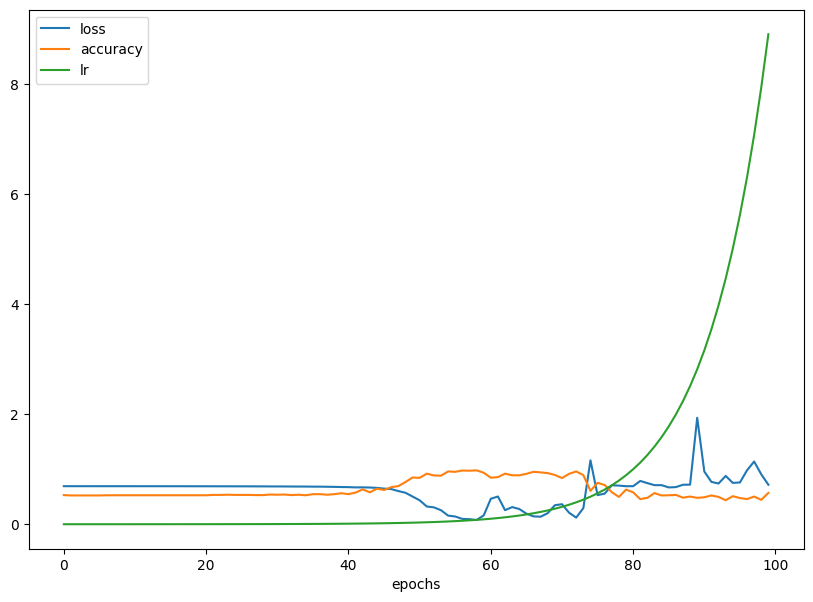

In [33]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

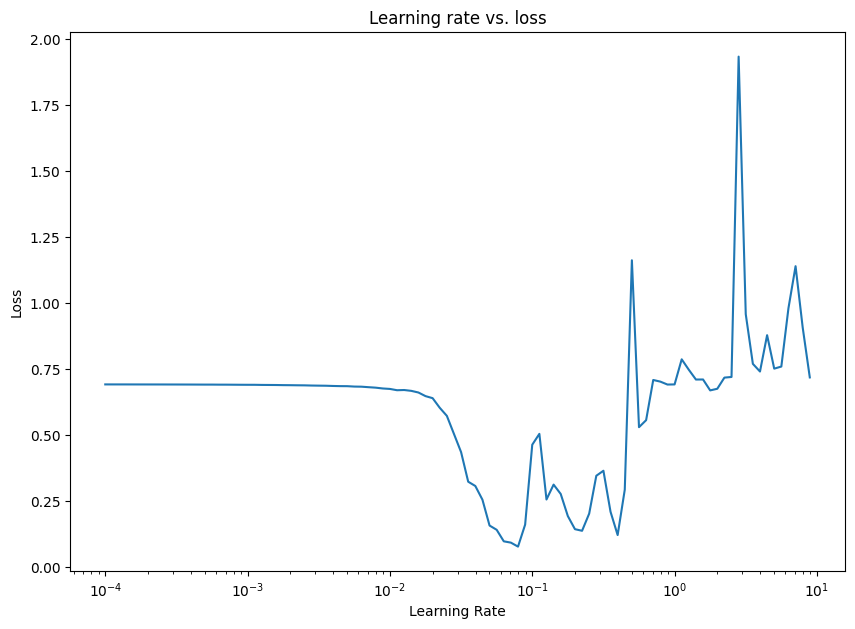

In [34]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [35]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 3. fittng the model

history = model_10.fit(X_train,y_train , epochs=30)

Epoch 1/30
22/22 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 2/30
22/22 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5443
Epoch 3/30
22/22 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6086
Epoch 4/30
22/22 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.5686
Epoch 5/30
22/22 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6386
Epoch 6/30
22/22 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.6986
Epoch 7/30
22/22 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7086
Epoch 8/30
22/22 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7143
Epoch 9/30
22/22 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7771
Epoch 10/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.8129
Epoch 11/30
22/22 [

In [36]:
# evaluate
model_10.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9667


[0.10230277478694916, 0.9666666388511658]

In [37]:
model_8.evaluate(X_test,y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.1129 - accuracy: 0.9900


[0.11293788999319077, 0.9900000095367432]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


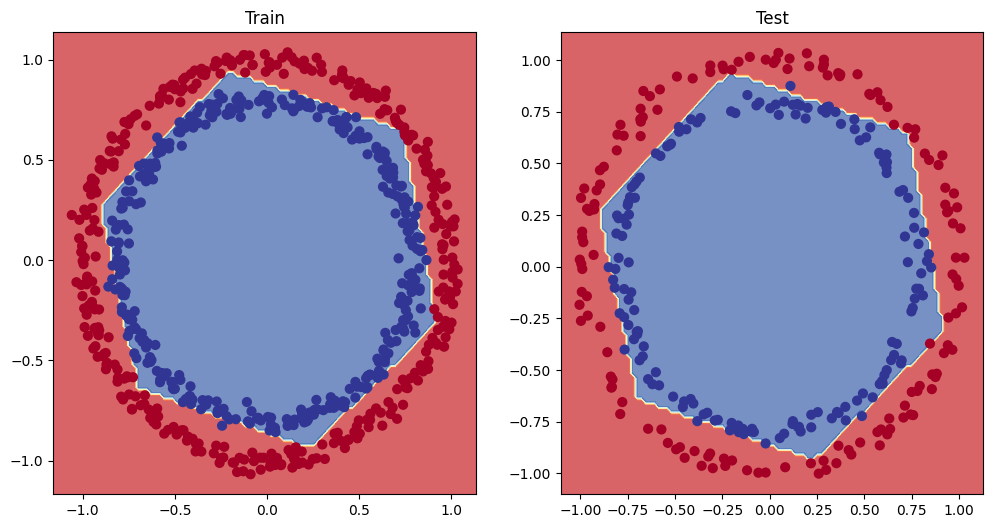

In [38]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

# More classification evalution methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrics
* Classification report(sklearn)


In [39]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

10/10 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9667
Model loss on the test set: 0.10230277478694916
Model accuracy on the test set: 96.67%


## Confusion matrcs

In [40]:
# create a confusion metrics
from sklearn.metrics import confusion_matrix

In [41]:
# Make prediction
y_preds = model_10.predict(X_test)

# Create a confusion metics
confusion_matrix(y_test, y_preds)

10/10 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [42]:
y_test[:10], y_preds[:10]

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1]),
 array([[8.1506652e-01],
        [3.7692260e-02],
        [6.0421131e-03],
        [8.6981475e-01],
        [1.2089195e-04],
        [8.5241950e-01],
        [9.1353846e-01],
        [5.7604551e-01],
        [6.3792113e-03],
        [9.5581228e-01]], dtype=float32))

In [43]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [44]:
# Make prediction
y_preds = model_10.predict(X_test)

# Create a confusion metics
confusion_matrix(y_test, tf.round(y_preds))

10/10 [==============================] - 0s 2ms/step


array([[144,   1],
       [  9, 146]])

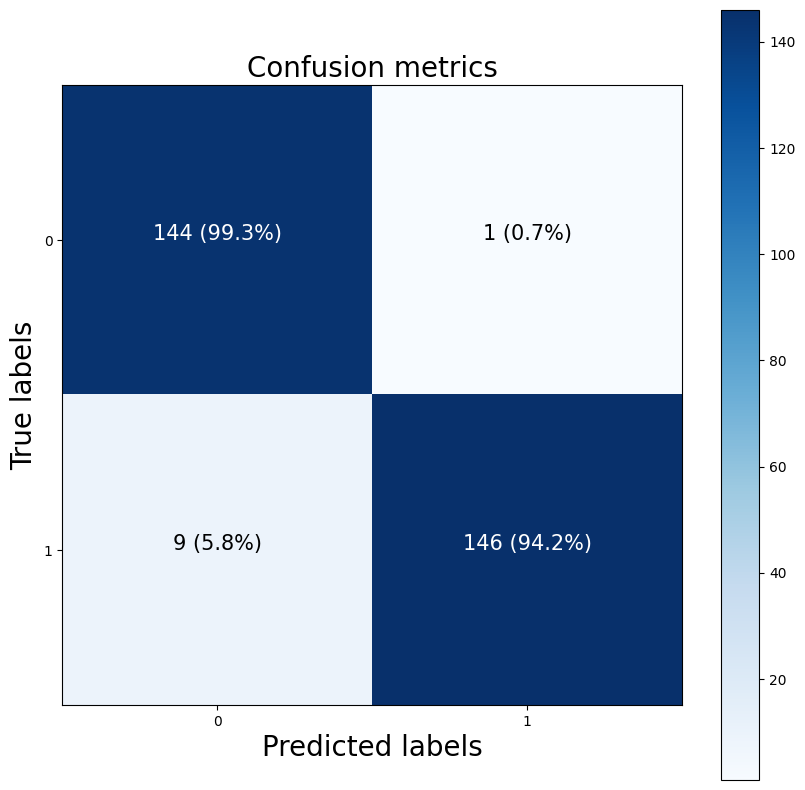

In [45]:
import itertools
figsize =(10,10)
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]
fig, ax = plt.subplots(figsize = figsize )
cax = ax.matshow(cm , cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion metrics",
       xlabel = "Predicted labels",
       ylabel = "True labels",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min())/2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multi-Class classification

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [47]:
# Lets see the firast traning example
print(f"Traning sample: \n{train_data[0]}\n")
print(f"Traning labels: \n{train_labels[0]}\n")

Traning sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

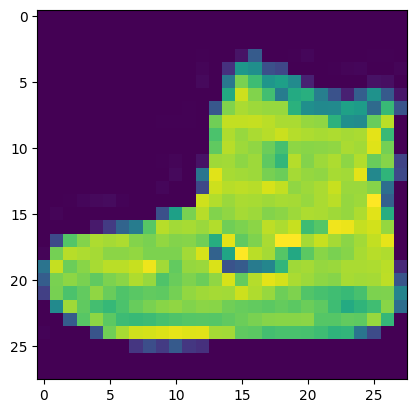

In [48]:
# plotting a single image
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [49]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Coat')

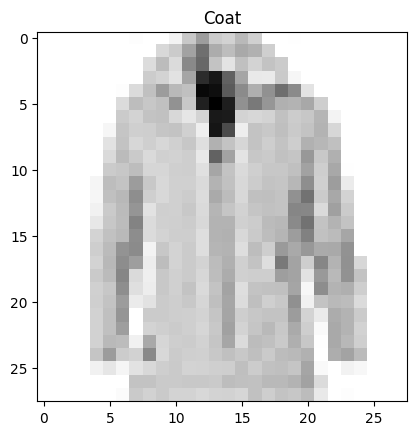

In [52]:
# plot an exaple image
index_of_choice = 19
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

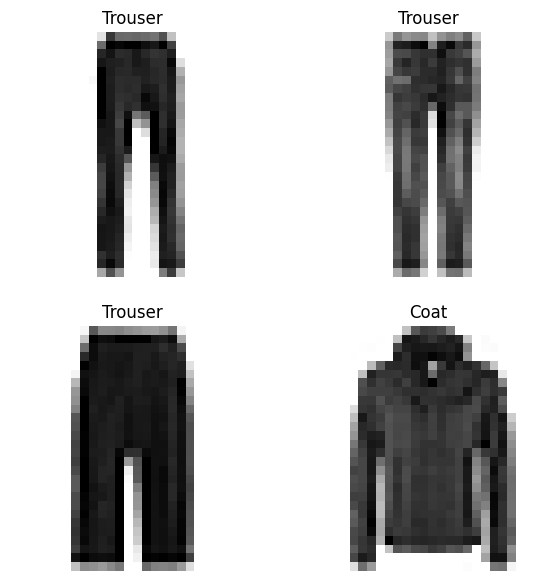

In [56]:
# ploting multiple random images from data set
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Creating a multi-class classification model

In [59]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. fitting the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs =10,
                                validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5364 - accuracy: 0.1104 - val_loss: 2.2660 - val_accuracy: 0.1166
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2288 - accuracy: 0.1338 - val_loss: 2.1754 - val_accuracy: 0.1533
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0855 - accuracy: 0.1764 - val_loss: 2.0687 - val_accuracy: 0.1767
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8590 - accuracy: 0.2144 - val_loss: 1.7684 - val_accuracy: 0.2299
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7259 - accuracy: 0.2518 - val_loss: 1.6667 - val_accuracy: 0.2679
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6136 - accuracy: 0.2955 - val_loss: 1.5712 - val_accuracy: 0.3333
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5617 - accuracy: 0.3135 - val_loss: 1.5320 - val_accuracy:

In [61]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 4)                 3140      
                                                                 
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dense_33 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [63]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [64]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1589 - accuracy: 0.5688 - val_loss: 0.8575 - val_accuracy: 0.6907
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7318 - accuracy: 0.7461 - val_loss: 0.6976 - val_accuracy: 0.7565
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6367 - accuracy: 0.7801 - val_loss: 0.6433 - val_accuracy: 0.7811
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5958 - accuracy: 0.7954 - val_loss: 0.6204 - val_accuracy: 0.7866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5742 - accuracy: 0.8004 - val_loss: 0.6145 - val_accuracy: 0.7857
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5578 - accuracy: 0.8071 - val_loss: 0.5918 - val_accuracy: 0.7953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5471 - accuracy: 0.8111 - val_loss: 0.5880 - val_accuracy

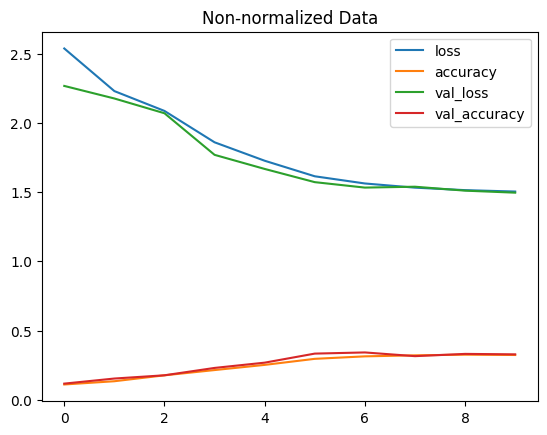

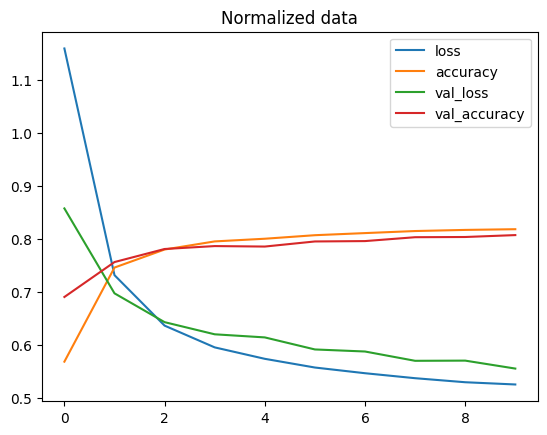

In [65]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2870 - accuracy: 0.4916 - val_loss: 0.9640 - val_accuracy: 0.6160 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8671 - accuracy: 0.6712 - val_loss: 0.8147 - val_accuracy: 0.7015 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7667 - accuracy: 0.7169 - val_loss: 0.7665 - val_accuracy: 0.7096 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7098 - accuracy: 0.7366 - val_loss: 0.6990 - val_accuracy: 0.7431 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6708 - accuracy: 0.7524 - val_loss: 0.6913 - val_accuracy: 0.7495 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6488 - accuracy: 0.7630 - val_loss: 0.6822 - val_accuracy: 0.7523 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

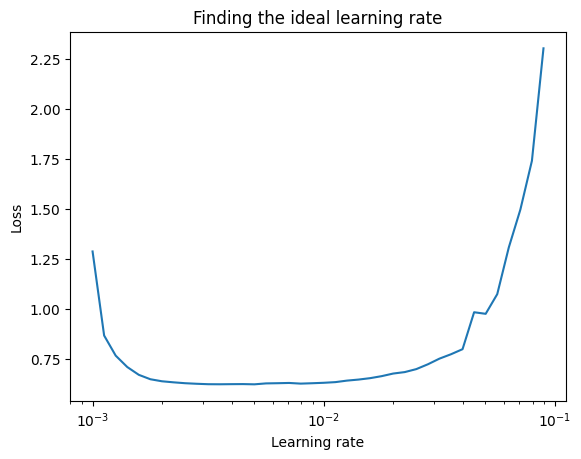

In [67]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))



Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4775 - accuracy: 0.4593 - val_loss: 0.8468 - val_accuracy: 0.7110
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7513 - accuracy: 0.7444 - val_loss: 0.7188 - val_accuracy: 0.7639
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6706 - accuracy: 0.7696 - val_loss: 0.6767 - val_accuracy: 0.7734
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6400 - accuracy: 0.7804 - val_loss: 0.6554 - val_accuracy: 0.7788
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6236 - accuracy: 0.7826 - val_loss: 0.6590 - val_accuracy: 0.7754
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6126 - accuracy: 0.7873 - val_loss: 0.6414 - val_accuracy: 0.7800
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6046 - accuracy: 0.7892 - val_loss: 0.6497 - val_accuracy:

In [69]:
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
   # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [77]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.65378388e-06, 5.44774579e-03, 4.14465084e-09, 9.45458305e-06,
        1.73573208e-04, 5.95481582e-02, 2.48379401e-05, 1.21169075e-01,
        1.39429579e-02, 7.99675524e-01],
       [1.13335816e-04, 1.08820068e-05, 9.33531284e-01, 1.29649760e-02,
        2.45167147e-02, 9.94465980e-18, 2.88626496e-02, 3.77369848e-13,
        1.91155429e-08, 2.13563292e-10],
       [5.22020649e-08, 9.99007642e-01, 1.63052818e-11, 8.42192327e-04,
        6.15761310e-05, 2.50649672e-17, 7.23576754e-09, 1.62613087e-05,
        9.00218485e-14, 7.21463512e-05],
       [5.43712311e-08, 9.98404562e-01, 9.04279256e-13, 1.57323910e-03,
        3.91660205e-06, 2.68524902e-19, 3.17093490e-10, 1.53529181e-05,
        7.30662598e-17, 3.02603644e-06],
       [1.96598902e-01, 7.16663781e-04, 2.02906564e-01, 8.94136205e-02,
        2.79804170e-02, 5.86261694e-06, 4.80354011e-01, 1.17488580e-05,
        1.99530576e-03, 1.68706629e-05]], dtype=float32)

In [78]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [88]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [89]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[807,   1,  11,  80,   4,   4,  84,   1,   7,   1],
       [  3, 934,   0,  45,   8,   0,   9,   0,   1,   0],
       [ 26,   1, 621,  16, 180,   0, 148,   0,   8,   0],
       [ 69,  13,   9, 813,  36,   0,  56,   0,   2,   2],
       [  1,   2,  89,  34, 761,   1,  99,   0,  13,   0],
       [  5,   1,   0,   0,   0, 874,   0,  68,  12,  40],
       [219,   4, 116,  63, 155,   1, 422,   0,  20,   0],
       [  0,   0,   0,   0,   0,  27,   0, 915,   0,  58],
       [ 12,   1,   3,   2,  11,  16,  44,   3, 900,   8],
       [  1,   1,   0,   0,   0,  11,   0,  45,   7, 935]])

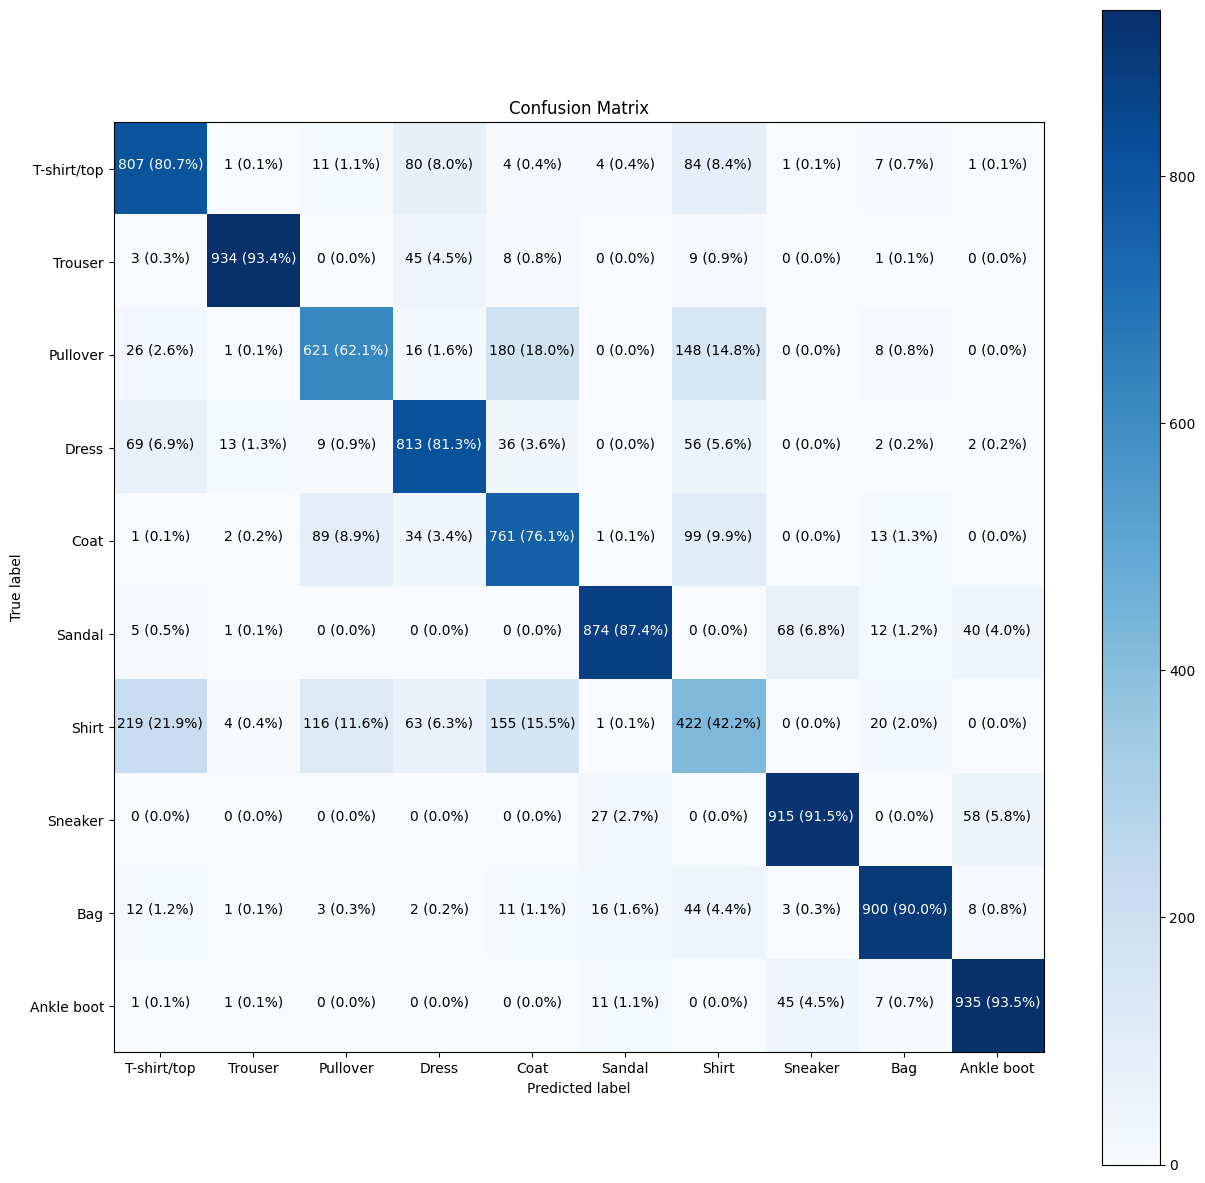

In [90]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [91]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 44ms/step


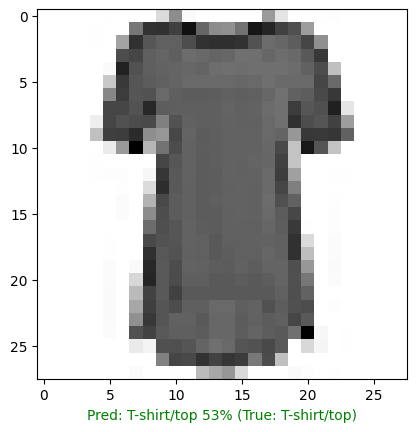

In [92]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [93]:
# Find the layers of our most recent model
model_14.layers

In [94]:
# Extract a particular layer
model_14.layers[1]

In [95]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.78229314,  0.43723887, -0.5189793 ,  0.7309496 ],
        [ 0.10465737, -0.07095128, -0.8058736 , -0.14981738],
        [ 0.8402865 , -0.84006137, -1.0751289 ,  0.5316439 ],
        ...,
        [ 0.2628932 , -0.1076728 , -0.56008816, -0.05550646],
        [-0.34846222,  0.60777724,  0.03233571, -0.04172223],
        [ 0.20270532, -0.2542455 , -0.08030227, -0.34684378]],
       dtype=float32),
 (784, 4))

In [96]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 0.45668417,  0.8024209 , -0.24638155, -0.87411994], dtype=float32),
 (4,))

In [97]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 4)                 3140      
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


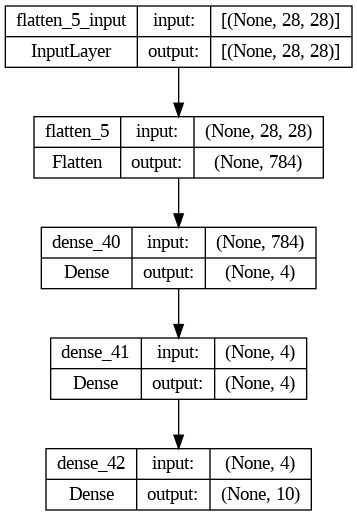

In [98]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)